In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import pandas_profiling


C:\Users\lenovo\AppData\Local\Temp\ipykernel_71960\273330486.py:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [2]:
# 读取数据
df = pd.read_csv('github_bot_processed_data.csv')

# 查看前几行数据
print(df.head())

# 查看每列的数据类型
print(df.info())

# 生成描述性统计信息
print(df.describe())


   label  type  site_admin  company   blog  location  hireable  \
0  Human  True       False    False  False     False     False   
1  Human  True       False    False   True     False      True   
2  Human  True       False     True   True      True      True   
3    Bot  True       False    False  False      True     False   
4  Human  True       False    False  False     False      True   

                                                 bio  public_repos  \
0                                                NaN            26   
1  I just press the buttons randomly, and the pro...            30   
2         Time is unimportant,\nonly life important.           103   
3                                                NaN            49   
4                                                NaN            11   

   public_gists  followers  following                 created_at  \
0             1          5          1  2011-09-26 17:27:03+00:00   
1             3          9          6  2015-06

In [3]:
# 将日期列转换为日期类型
df['created_at'] = pd.to_datetime(df['created_at'])
df['updated_at'] = pd.to_datetime(df['updated_at'])

# 将 public_repos, public_gists, followers, following 等进行对数变换
df['log_public_repos'] = np.log1p(df['public_repos'])
df['log_public_gists'] = np.log1p(df['public_gists'])
df['log_followers'] = np.log1p(df['followers'])
df['log_following'] = np.log1p(df['following'])


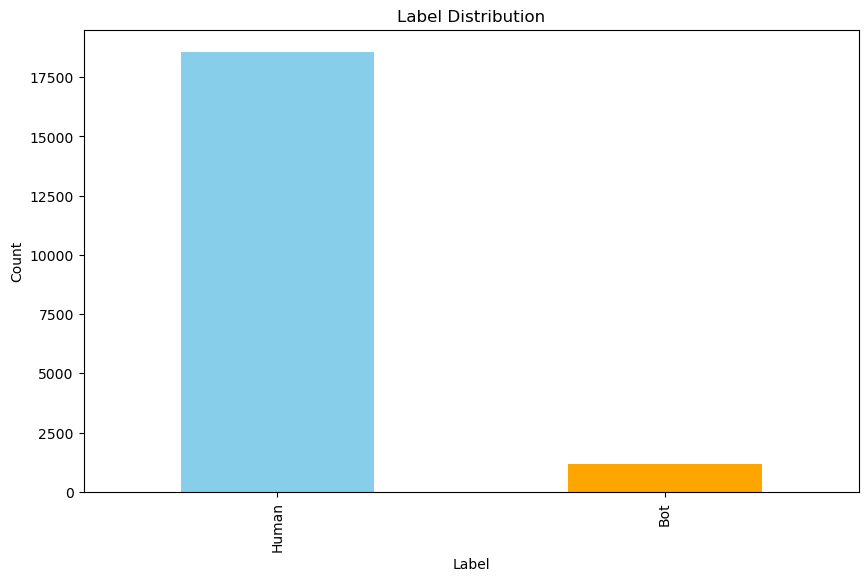

In [4]:
# 条形图：展示label列的类别分布
plt.figure(figsize=(10, 6))
df['label'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


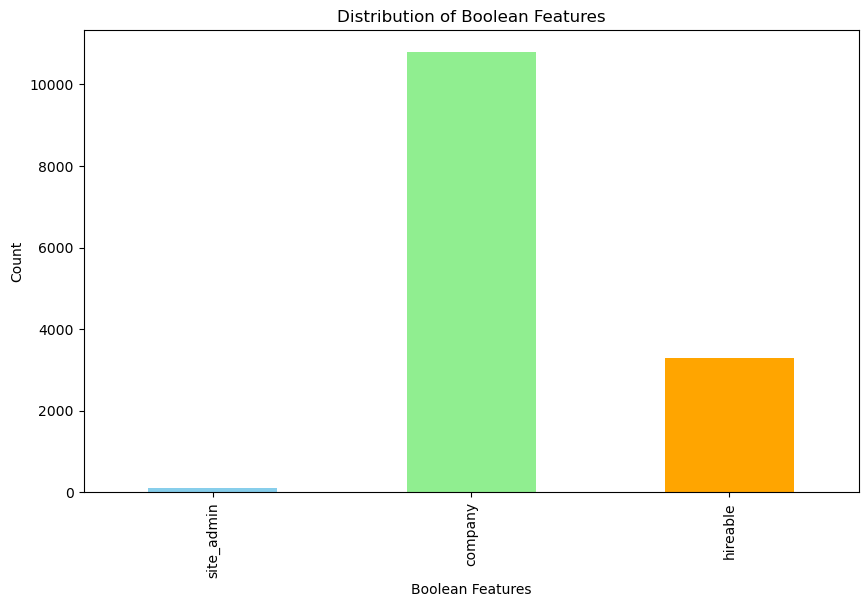

In [5]:
# 堆积柱状图：展示site_admin、company等布尔特征的分布
bool_columns = ['site_admin', 'company', 'hireable']
df[bool_columns].sum().plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'lightgreen', 'orange'])
plt.title('Distribution of Boolean Features')
plt.xlabel('Boolean Features')
plt.ylabel('Count')
plt.show()


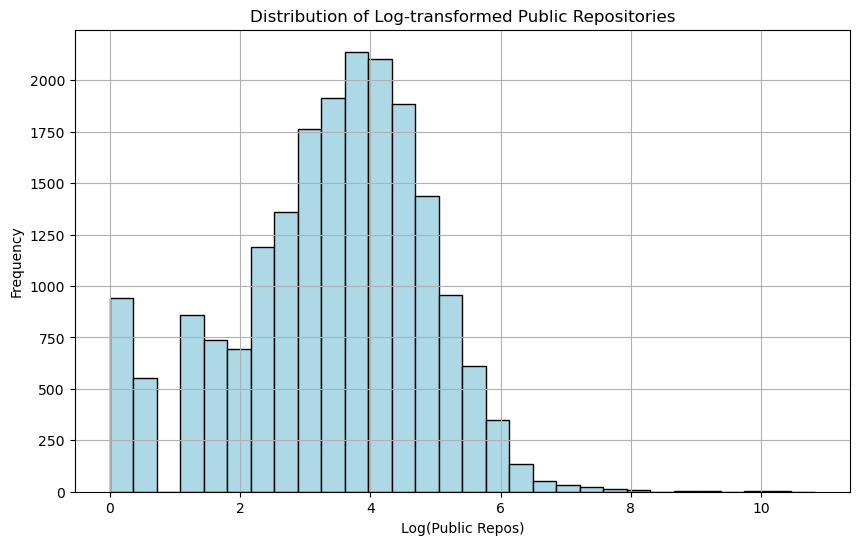

In [6]:
# 直方图：展示log_public_repos的分布
plt.figure(figsize=(10, 6))
df['log_public_repos'].hist(bins=30, color='lightblue', edgecolor='black')
plt.title('Distribution of Log-transformed Public Repositories')
plt.xlabel('Log(Public Repos)')
plt.ylabel('Frequency')
plt.show()


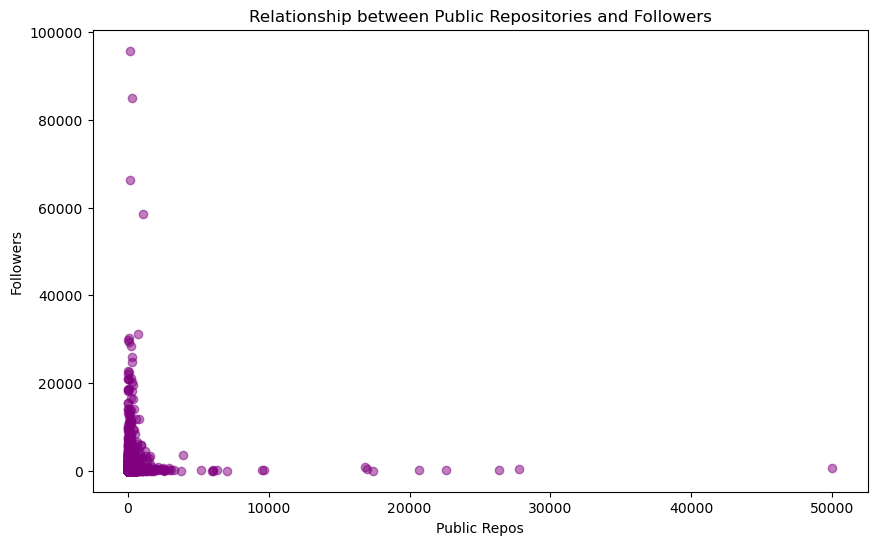

In [7]:
# 散点图：展示public_repos与followers之间的关系
plt.figure(figsize=(10, 6))
plt.scatter(df['public_repos'], df['followers'], alpha=0.5, color='purple')
plt.title('Relationship between Public Repositories and Followers')
plt.xlabel('Public Repos')
plt.ylabel('Followers')
plt.show()


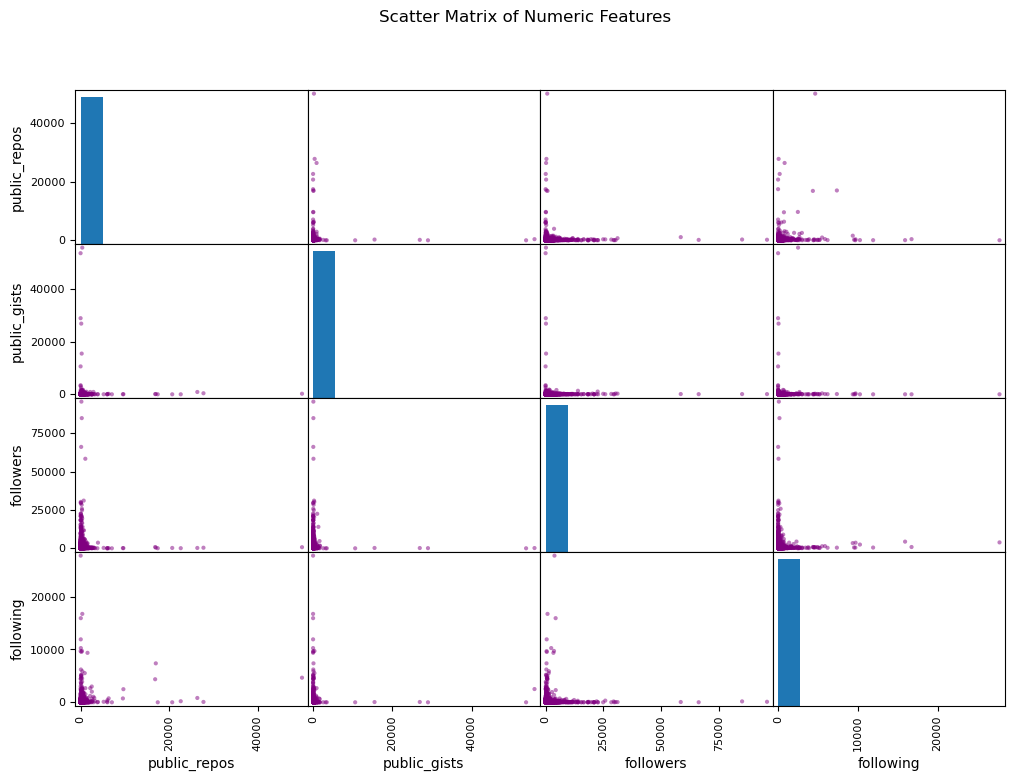

In [8]:
# 散点矩阵：展示多个数值型特征之间的成对关系
numeric_cols = ['public_repos', 'public_gists', 'followers', 'following']
scatter_matrix(df[numeric_cols], figsize=(12, 8), diagonal='hist', color='purple')
plt.suptitle('Scatter Matrix of Numeric Features')
plt.show()


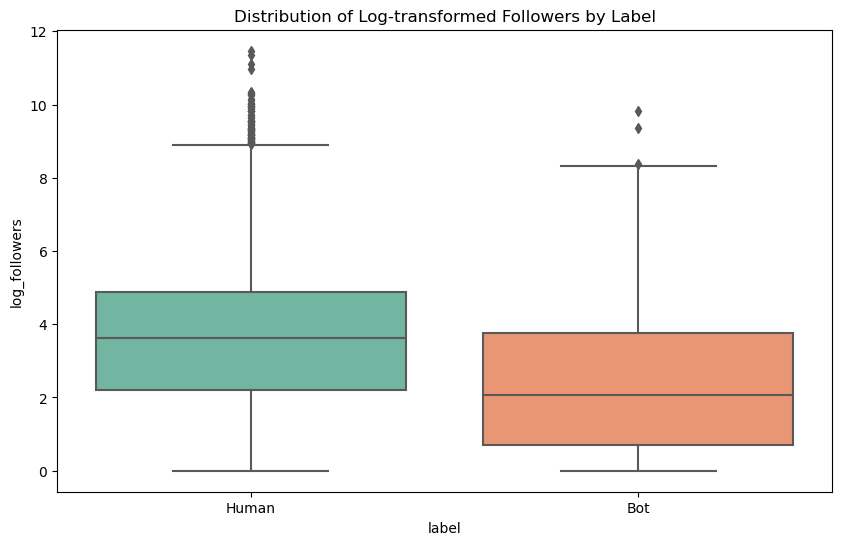

In [9]:
# 箱线图：展示不同label类别下log_followers的分布
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='log_followers', data=df, palette='Set2')
plt.title('Distribution of Log-transformed Followers by Label')
plt.show()


d:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

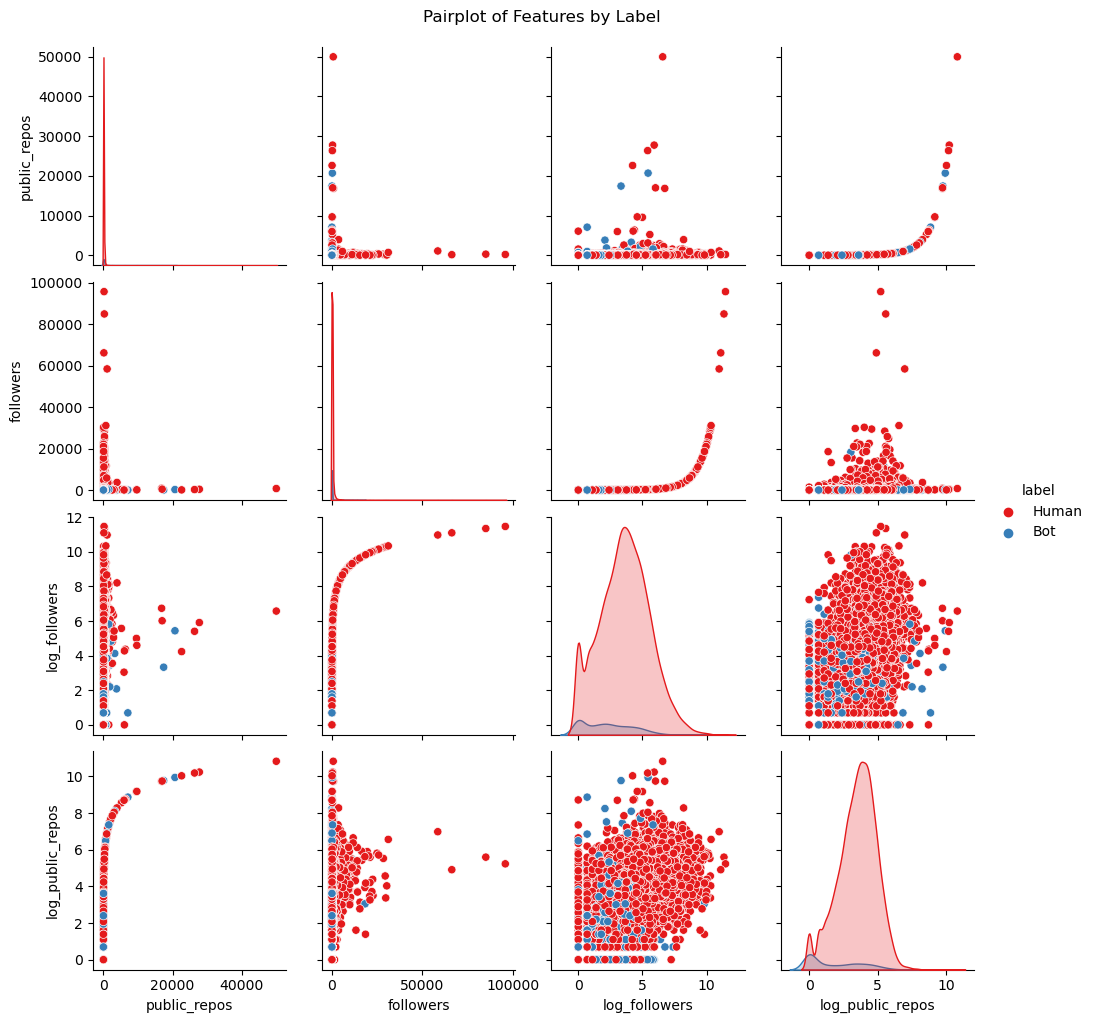

In [10]:
# 成对图：展示不同特征之间的成对关系，并根据label分类
sns.pairplot(df, hue='label', vars=['public_repos', 'followers', 'log_followers', 'log_public_repos'], palette='Set1')
plt.suptitle('Pairplot of Features by Label', y=1.02)
plt.show()


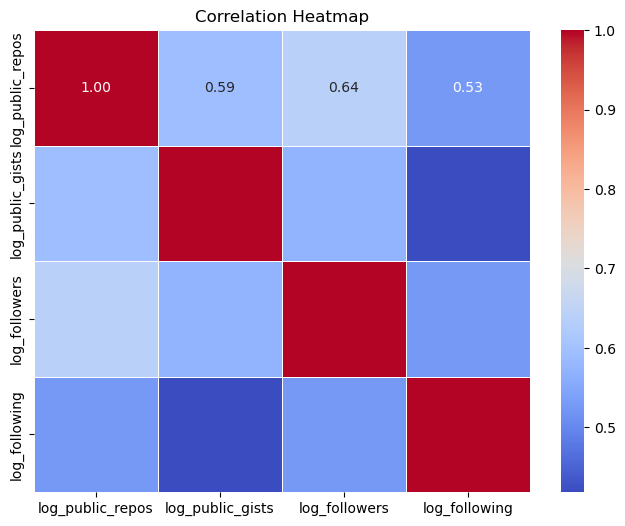

In [11]:
# 热图：展示log_public_repos、log_public_gists、log_followers、log_following等特征之间的相关性
corr_matrix = df[['log_public_repos', 'log_public_gists', 'log_followers', 'log_following']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


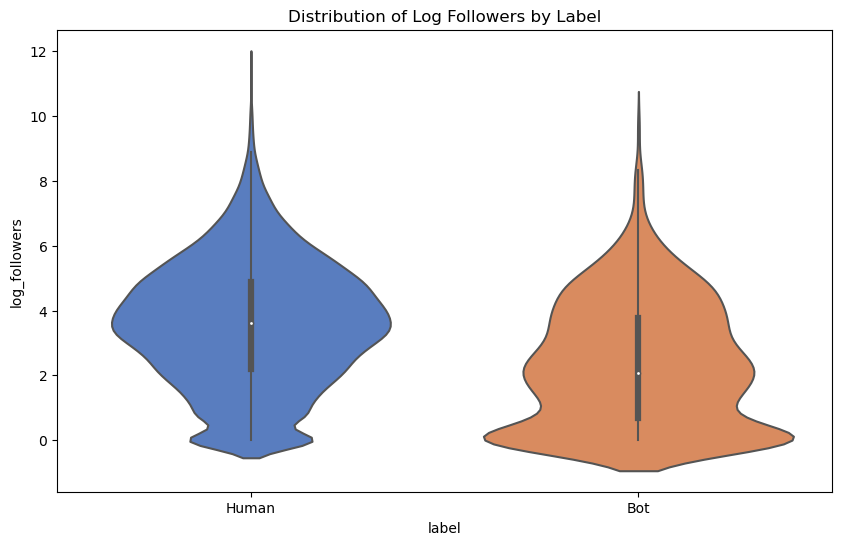

In [12]:
# 小提琴图：展示label与log_followers之间的分布差异
plt.figure(figsize=(10, 6))
sns.violinplot(x='label', y='log_followers', data=df, palette='muted')
plt.title('Distribution of Log Followers by Label')
plt.show()


In [13]:
# 生成交互式数据分析报告
profile = pandas_profiling.ProfileReport(df, title="GitHub Data Profiling Report", explorative=True)
profile.to_file("github_data_report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]